# Space Mice Genes
## Heat Propagation and Clustering Package
### Python 3 compatible version

----------------------

Author: Mikayla Webster (13webstermj@gmail.com)

Date: 19th May, 2018

----------------------

<a id='toc'></a>
## Table of Contents
1. [Background](#background)
2. [Import packages](#import)
3. [Define Analysis Preferences](#pref)
3. [Load Networks](#load)
4. [Run Heat Propagation](#heat)
5. [Clustering](#cluster)

## Background
<a id='background'></a>

In [5]:
import sys
code_path = '../../network_bio_toolkit'
sys.path.append(code_path)

import importlib
import Heat3
importlib.reload(Heat3)

<module 'Heat3' from '../../network_bio_toolkit\\Heat3.py'>

In [6]:
symbol = 'symbol'
entrez = 'entrez'

human = 'human'
mouse = 'mouse'

heat = Heat3.Heat(gene_type = symbol, species = mouse)

In [7]:
filename = '../../background_networks/10090.protein.links.v10.5.txt'
heat.load_STRING_links(filename, confidence_filter = 700)

print('\nNumber of interactions: ' + str(len(list(heat.DG_universe.edges()))))

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-13911...done.
Finished.
70 input query terms found dup hits:
	[('ENSMUSP00000103671', 2), ('ENSMUSP00000087485', 2), ('ENSMUSP00000000574', 2), ('ENSMUSP000001267
410 input query terms found no hit:
	['ENSMUSP00000044573', 'ENSMUSP00000023462', 'ENSMUSP00000137380', 'ENSMUSP00000077813', 'ENSMUSP000
Pass "returnall=True" to return complete lists of duplicate or missing query terms.

Number of interactions: 368638


In [8]:
saved_DG_universe = heat.DG_universe
heat.DG_universe = saved_DG_universe

In [9]:
# load DEG file
DEG_filename = '../../DEG_databases/DE_CoeffspaceFlight - groundControl_glds48_20180312.csv'  
heat.create_DEG_list(DEG_filename, p_value_filter = 0.02, sep = ',')

print('Number of DEG\'s: ' + str(len(heat.DEG_list)))

Number of DEG's: 45


../../network_bio_toolkit\create_graph.py:363: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  df = pd.DataFrame.from_csv(filename, sep = sep)


In [10]:
heat.normalized_adj_matrix()

In [11]:
saved_Wprime = heat.Wprime
heat.Wprime = saved_Wprime

In [12]:
heat.draw_heat_prop(num_nodes = 500,
#                  random_walk = False,
                  edge_width = 2,
                  edge_smooth_enabled = True,
                  edge_smooth_type = 'bezier',
                  node_size_multiplier = 5,
                  hover = False,
                  hover_connected_edges = False,
                  largest_connected_component = True,
                  physics_enabled = True,
                  node_font_size = 40,
                  graph_id = 1,
                  node_shadow_x = 6)

In [13]:
heat.check_exists('node_to_cluster')

No cluster information currently on file. Please run the following method:
 - Heat_instance.draw_clustering_with_annotation()
Or assign your own using Heat_instance.node_to_cluster



False

In [14]:
heat.draw_clustering(rad_positions = False,
                k = None,
                largest_connected_component = True,
                num_top_genes = 500,
                cluster_size_cut_off = 5,
                remove_stray_nodes = True,
                node_spacing = 700,
                node_size_multiplier = 10,
                physics_enabled = True,
                node_font_size = 40,
                graph_id = 2,
                edge_width = 2,
                edge_smooth_enabled = True,
                edge_smooth_type = 'bezier',
                hover = False,
                hover_connected_edges = False
               )

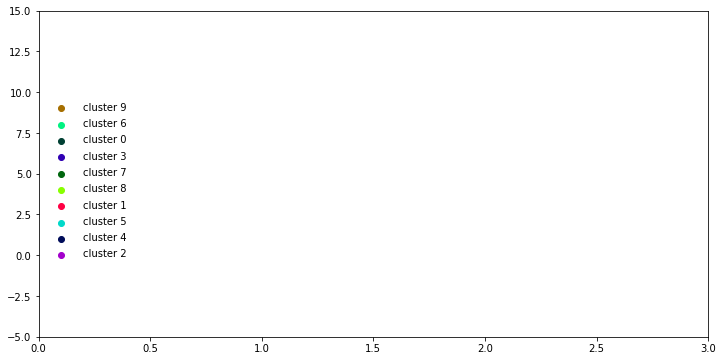

In [15]:
heat.cluster_legend(cluster_size_cut_off = 5)

In [16]:
heat.draw_clustering(num_top_genes = 500,
                cluster_size_cut_off = 5,
                remove_stray_nodes = True,
                r = 0.4,
                node_spacing = 600,
                node_size_multiplier = 4,
                physics_enabled = False,
                node_font_size = 15,
                graph_id = 3,
                node_shadow_x = 6,
                largest_connected_component = True,
                color_lfc = True,
                vmin = -1,
                vmax = 1
               )

In [17]:
heat.draw_clustering_with_annotation(graph_id = 4,
                        num_nodes = 500,
                        annotation = True,
                        node_spacing = 700,
                        node_size_multiplier = 5,
                        physics_enabled = False,
                        node_font_size = 20,
                        color_lfc = True,
                        vmin = -1,
                        vmax = 1,
                        node_size = 7)

Annotating cluster 0 of 10...
Annotating cluster 1 of 10...
Annotating cluster 2 of 10...
Annotating cluster 3 of 10...
Annotating cluster 4 of 10...
Annotating cluster 5 of 10...
Annotating cluster 6 of 10...
Annotating cluster 7 of 10...
Annotating cluster 8 of 10...
Annotating cluster 9 of 10...
Annotating cluster 10 of 10...
Done!


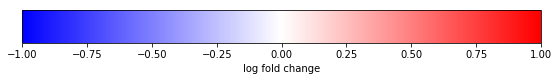

In [18]:
heat.draw_legend(vmin = -1, vmax = 1, label = 'log fold change')

In [84]:
#heat.write_cluster_table('cluster_table_3.csv')